## Exponential decay process 

Demonstration: 
    1. Counting data from a exponentially decaying process
    2. Exponential model
    3. Maximum likelihood with Poisson error distribution.
    4. AmoebaFitter with other error distributions.

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import ExpModel
from BayesicFitting import PolynomialModel
from BayesicFitting import PoissonErrorDistribution
from BayesicFitting import AmoebaFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import printclass
import matplotlib.pyplot as plt


define some constants

In [2]:
N = 201
a = 17.8
b = -0.2

make a 3-degree polynomial

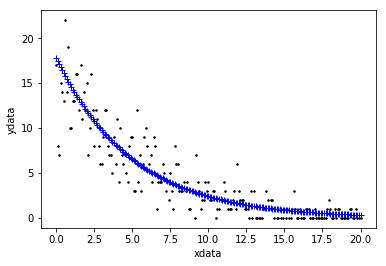

In [3]:
x = numpy.linspace( 0.0, 20.0, N, dtype=float )
ym = a * numpy.exp( b * x )

#y = ym + numpy.random.lognormal( ym, numpy.sqrt( ym ), N )
#y = numpy.asarray( y, dtype=int )
y = numpy.random.poisson( ym )
# plot the data along with the "truth"
plotFit( x, y, show=False )
plt.plot( x, ym, 'b+')
plt.show()

Define the model

In [4]:
mdl = ExpModel( )
print( mdl )


Exp: f( x:p ) = p_0 * exp( p_1 * x )


define the fitter: AmoebaFitter with error distribution

In [5]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
 
# find the parameters
param = fitter.fit( y )

# show all attributes of the fitter class 
printclass( fitter )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++
AmoebaFitter
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
chisq           854.9636467328888
errdis          poisson
fitIndex        None
fixedScale      None
imageAssistant  None
isChisq         False
iter            35
keep            None
landscape       <BayesicFitting.source.MaxLikelihoodFitter._LogL object at 0x109783eb8>
logLikelihood   -351.5795878316997
maxIter         2000
model           Exp
ndim            1
npfit           2
ntrans          70
nxdata          201
plotfreq        0
plotter         <BayesicFitting.source.IterationPlotter.IterationPlotter object at 0x1087f0748>
power           2.0
simplex         [[16.93557466 -0.19681845]  [16.92094702 -0.1967646 ]  [16.93593586 -0.19695017]  ]
sumwgt          201
tolerance       0.0001
tooLarge        100
values          [351.5795878316997  351.5795913374361  351.5796116932403  ]
verbose         1
xdata           [0.0  0.1  0.2  0.30000000000000004  0.4  0.5 

In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )

Parameters : [   16.936   -0.197]
StDevs     : [    0.570    0.010]
Chisq      :   854.964
Scale      :     2.062
Evidence   :  -159.535


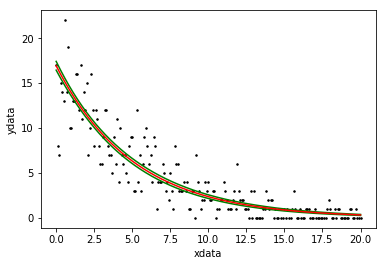

In [7]:
plotFit( x, data=y, model=mdl, fitter=fitter )

In [8]:
fitter = AmoebaFitter( x, mdl )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   15.957   -0.180]   837.859        30


In [9]:
fitter = AmoebaFitter( x, mdl, errdis="gauss" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   15.957   -0.180]   837.859        26


In [10]:
fitter = AmoebaFitter( x, mdl, errdis="laplace" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   16.022   -0.193]   852.093        37


In [11]:
fitter = AmoebaFitter( x, mdl, errdis="cauchy" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   16.154   -0.201]   870.520        23


In [12]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ))

[   16.928   -0.197]   854.782        20
